# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [23]:
# Minimum price of the data
prices_np_array = prices.values
minimum_price = np.amin(prices_np_array)

# Maximum price of the data
maximum_price = np.amax(prices_np_array)

# Mean price of the data
mean_price = np.mean(prices_np_array)

# Median price of the data
median_price = np.median(prices_np_array)

# Standard deviation of prices of the data
std_price = np.std(prices_np_array)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer:**

1. Higher value of 'RM' indicates that the houses are bigger in size. Hence, the price ('MEDV') would be higher
2. If 'LSTAT' is high, it indicates a lower class working community in the neighborhood. Hence, the prices of houses ('MEDV') must be low in order for the community to afford them and vice versa
3. A high value of 'PTRATIO' would indicate less teachers available for teaching students. This in turn indicates that the quality of education is lower as a single teacher would not be able to provide personal guidance to all the students under him/her. Families with children would generally want to live in a place where the quality of education is high.
    Hence, for a lower value of 'PTRATIO', would attract more families and hence the price of house ('MEDV') would be higher fue to demand. On the other hand, higher value of 'PTRATIO' would result in lower value of 'MEDV'
    
In conclusion,

1. **Increase** in value of 'RM' will result in **increase** in value of 'MEDV'
2. **Increase** in value of 'LSAT' will result in **decrease** in value of 'MEDV'
3. **Increase** in value of 'PRATIO' will result in **decrease** in value of 'MEDV'

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [12]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [13]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

Yes, the model captures variation of target variable to a high extent. The R2 score of the model is close to 92% stating that 92% variations in the target variable can be predicted from the training data

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.model_selection` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [24]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=5)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer:**

Splitting a dataset into training an testing subsets is mainly done to avoid underfitting and overfitting of the model and arrive at the best possible fit. However, the ratio of samples in training to testing subset also has an impact on the performance of the model. This is explained below:

1. If the ratio of samples in training to testing subset is very high, for example 0.95 or 95%, the model will have very less samples to test the perforance. The model will see almost all data during training and then it will fit to that data. However, when it encounters the test set, it may give low accuracy results. This is because the model did not have enough test samples to generalize. It overfits to the training data.

2. If the ratio of samples in training to testing subset is very low, for example 0.5 or 50%, the model wil have very less data to train on. Hence, it does not get the opportunity to correlate features with the target variable. The model over generalizes and underfits to the training data.

3. A good ratio of training to testing subset is 0.7 to 0.8 or 70 to 80%

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

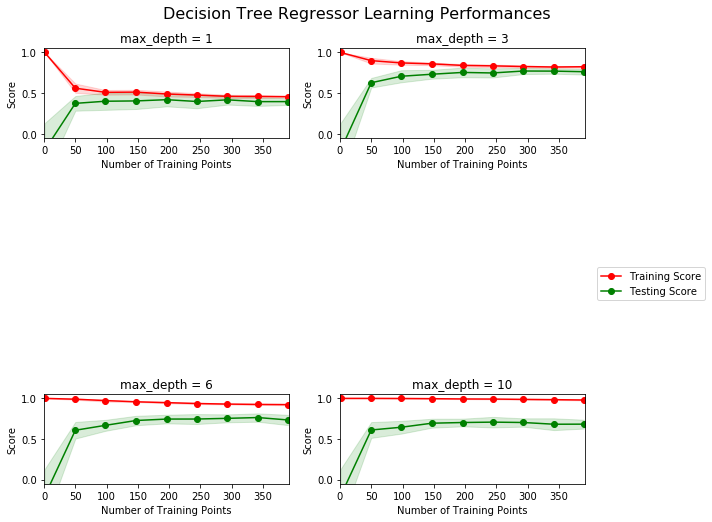

In [15]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer:**

**Choose one of the graphs above and state the maximum depth for the model.**

1. I choose the first graph with maximum depth (max_depth) of 1
2. The training and testing curves converge and the score of model stabilizes. However, the scores for both training and testing are low (close to 0.5). A good model should at least reach the benchmark score, which is around 0.8 to begin with.
3. It is evident that max_depth of 1 is a case of underfit. The model is less complex and does not see relations between the features for accurate prediction.
4. Increasing the max_depth helps in improvement of both training and testing scores. Model with max_depth of 3 have high scores of close to 0.9.
5. However, increasing the max_depth beyond 5 is making the model complex and reaching a state of overfit to the data. This can be seen from graphs for max_depth 6 and max_depth of 10 where the training score is close to 1, testing score low and most importanty, the curves do not seem to converge


**What happens to the score of the training curve as more training points are added? What about the testing curve?**

Adding more training points while the model is not stable, decreases the training score asymptotically. On the other hand, the testing scores increase asymptotically when more training points are added. However, this is only true when the model is learning and the scores are not stable.


**Would having more training points benefit the model?**

Adding more training points would not affect final training and testing scores. As seen from all the graphs, the training and testing scores stabilize around 200 to 250 training points. Hence, adding of more training points would simply result in increased time to train the model without significant improvement in scores.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

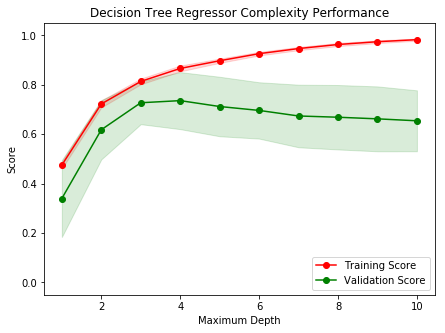

In [16]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer:**

1. When the model is trained with maximum depth of 1, the model suffers from high bias or underfit. One can see that both the training and testing scores are low
2. When the model is trained with maximum depth of 10, the model suffers from high variance or overfit. One can see that the training and testing curves do not converge. The training score is close to 1 and the testing score close to 0.7. The model do not generalize well

From the complexity curves, a model with maximum depth of 3 is a best fit to the data with testing score of 0.75

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer:**

1. Model with maximum depth of 3 trains well on the training data and also generalizes well to unseen data
2. For the model of maximum depth 3, the training and testing curves converge. Also, these curves converge to a value close to the benchmark of score, say 0.8. The model performs well on testing set with a score of 0.75. Here, adding more samples may help the model to perform better.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer:**

Grid search can be considered as a simplified version of Gradient Descent algorithm, with lesser number of hyperparameter variations. Tuning a model to reach the best fit stage requires tuning of all the hyperparameters in relation to each other. Gradient Descent usually works with very small increments/decrements in the values of the hyperparameters and then calculating the score of the model.

Grid search algorithm works as follows:

1. It expects a finite range of values for all the hyperparameters. For eg, [1 to 10] for the max_depth and [2,4,6,8,10] for the min-samples_leaf so on for a decision tree classifier
2. It takes all the variations for all of the hyperparameters and makes a grid of those
3. Taking one variation at a time, grid search calculates a score of the model by training on the sub set of data. This then stores the score against the variation of values used
4. Step 3 is run for all possible permutations or variations of all the hyperparameters. A list of scores is obtained at the end
5. From the list of scores, the best score is selected and the corresponding values for hyperparameters used in that run are extracted. These then become the tuned values for using in building the model

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer:**

Grid search algorithm is used to tune the hyperparameters by iteratively training on a subset of data and calculating a score. The data, hyperparameters, scoring function and the score all being mathematical entities, results of grid search highly depend on the training subset of data used. Compared to a puzzle, grid search outputs the values of hyperparameters fitting in the data puzzle. If the data is changed, the hyperparameters may change resulting in poor performance of the model on test data set.


To avoid this dependency on data, shuffled data subsets of values are used while running each iteration of grid search. This is achieved using k-fold cross validation technique explained below:

**K-fold cross validation algorithm**
    a. The data set is divided into k sub sets. k - 1 subsets then are reserved from training while 1 for cross validation
    b. In each iteration, model is trained on k - 1 subsets and the score is calculated by on the remaining one subset known as the cross validation sub set
    c. In some algorithms, the data is shuffled before dividing into k subsets to ensure variations in data before training
    d. At the end, the average of scores in each iteration is calculated to note the overall performance of the model
    
Below image is graphical representation of k-fold cross validation algorithm

![image.png](https://udacity-github-sync-content.s3.amazonaws.com/_imgs/8650/1463631727/fig-5-full.png)
    
**Choosing the k value**

A poorly chosen k value may result in conditions of high bias (underfit) or high variance (overfit)
Three common tactics for choosing a value for k are as follows:

1. Representative: The value for k is chosen such that each train/test group of data samples is large enough to be statistically representative of the broader dataset.
2. k=10: The value for k is fixed to 10, a value that has been found through experimentation to generally result in a model skill estimate with low bias and modest variance.
3. k=n: The value for k is fixed to n, where n is the size of the dataset to give each test sample an opportunity to be used in the hold out dataset. This approach is called leave-one-out cross-validation.


**Benefits of k-fold cross validation**

k-fold cross validation is used to avoid overfitting when the data set is of small size. By shuffling and dividing data into subsets, the model trains ona variety of combinations and does not incline to one set of parameter. In other words, the model generalizes better even with lesser data points for training

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.20/modules/generated/sklearn.model_selection.GridSearchCV.html) from `sklearn.model_selection` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [19]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth": [1, 2, 3, 4, 5, 7, 9, 10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [20]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer:**

The output of fit_model method states 4 would be the best value of max_depth hyperparameter for an optimal model. As per my analysis in question 6, I guessed that max_depth of 3 would result in optimal model as the training and testing curves appear to converge more. However, when max_depth is 4, the training score is higher (as seen from the complexity curve) and the fit_model chooses it to be the best value

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [21]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $411,931.58
Predicted selling price for Client 2's home: $235,620.00
Predicted selling price for Client 3's home: $922,740.00


**Answer:**

**What price would you recommend each client sell his/her home at?**

The model predicts resonable prices for all the clients. This is explained below. I will recommend following least figure values:

Client 1 - $400,000$
Client 1 - $200,000$
Client 1 - $900,000$

Any price above these would be good negotiatble and profit the client

**Do these prices seem reasonable given the values for the respective features?**

1. Client 1 has a house with rooms greater than client 2 and less than client 1. Also, this house lies in a neighborhood of moderate poverty level with moderate quality of education (infered from student to teacher ratio). Hence, the price of this house ($411,931$) must lie between that of client 2 and client 3. This is evident from the output
2. Client 2 has the smallest house in a neighborhood of high poverty level. Also, the student to teacher ratio is high infering lower quality of education. Hence, the price for this house should be the lowest. Value predicted by the model ($235,620$) supports my hypothesis from data exploration step
3. Client 3 has the biggest house in a neighborhood of low poverty level. Also, the student to teacher ratio is low infering higher quality of education. Hence, the price for this house should be the highest. Value predicted by the model ($922,740$) supports my hypothesis from data exploration step

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [22]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $428,316.00
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $37,132.67


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer:**

**Should the model be considered for a real-world setting?**

No, the model cannot be considered for real world predictions as it is predicting prices somewhere in the range of $40, 000$. Forty thousand dollars is a big range indicating the model is not robust to changes in training data


**Can the model be optimized by collecting more data?**

Yes, the robustness of the model can be improved by collecting and using data more specific and influential in making a prediction. For eg, the area of plot in square feet would weigh more than the number of rooms while making a prediction.


**Can the model be used for in urban and rural cities?**

Few parameters used in training the model like number of rooms and the level of poverty are generic to urban and rural areas and hence do not affect the prediction. However, the prices of house provided to the model while training are recorded in Boston, which an urban city. This important information is not explicit and hence, the model would generally end up predicting high house prices for a rural city


**How relevant today is data that was collected from 1978? How important is inflation?**

Inflation plays a major implicit influence in the price of house. Similar to urban vs rural housing prices, inflation should also be considered while training the model. The data used in this model is multiplicatively scaled which makes it relevant even if it was recorded in 1978


**Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?**

No, square feet area, quality of appliances will definitely play a role in making the model more robust


**Is the model robust enough to make consistent predictions?**

Not as of now. However, it can be made robust by adding more data fields and explictly specifying key factors one of them being urban vs rural area


**Would data collected in an urban city like Boston be applicable in a rural city?**

No. This model will end up predicting higher house prices most of the times when applied in rural areas


**Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?**

This is a subjective factor for buyers. Some buyers like bachelors and students won't consider the characterstics of neighborhood much as it might not be their long term residence. On the other hand, families with young children will desire a steady life and lively neighborhood.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.